In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from shapely.geometry import Point
import shapely
from shapely.geometry import *
from geopandas.geoseries import *
from scipy.spatial import distance

In [2]:
project_path='/projectdata/nckugeo01/'
POI = 'POI/' 
road = '道路_length/'
landuse_area = '/Landuse_area/'

In [3]:
real_data = pd.read_excel(project_path+'實價登錄資料.xls')

## 數量計算

In [4]:
rest_gp = gpd.GeoDataFrame.from_file(project_path+POI+'Restaurant.shp')

In [6]:
restaurant_cnt_list = []

In [7]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    count = 0 #用來數有幾間店
    for i in range(len(rest_gp)):
        point = Point(rest_gp.X坐標[i],rest_gp.Y坐標[i])
        if temp_Real_Data_Point.contains(point):
            count+=1
    restaurant_cnt_list.append(count)
    

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [9]:
restaurant_cnt_pd=pd.DataFrame(restaurant_cnt_list)

In [11]:
restaurant_cnt_pd.columns=['Dali_Resta']

In [13]:
restaurant_cnt_pd.to_csv('Dali_Resta.csv',index=False)

In [15]:
transport_gp = gpd.GeoDataFrame.from_file(project_path+POI+'Transportation.shp')

In [16]:
transport_cnt_list = []

In [17]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    count = 0 #用來數有幾間店
    for i in range(len(transport_gp)):
        point = Point(transport_gp.X坐標[i],transport_gp.Y坐標[i])
        if temp_Real_Data_Point.contains(point):
            count+=1
    transport_cnt_list.append(count)

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [18]:
transport_cnt_pd=pd.DataFrame(transport_cnt_list)

In [19]:
transport_cnt_pd.columns=['Trans_P']

In [20]:
transport_cnt_pd.to_csv('Trans_P.csv',index=False)

In [21]:
hotel_gp = gpd.GeoDataFrame.from_file(project_path+POI+'Hotel.shp')

In [22]:
hotel_cnt_list = []

In [23]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    count = 0 #用來數有幾間店
    for i in range(len(hotel_gp)):
        point = Point(hotel_gp.X坐標[i],hotel_gp.Y坐標[i])
        if temp_Real_Data_Point.contains(point):
            count+=1
    hotel_cnt_list.append(count)

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [28]:
hotel_cnt_pd=pd.DataFrame(hotel_cnt_list)

In [29]:
hotel_cnt_pd.columns=['Dali_Hotel']

In [30]:
hotel_cnt_pd.to_csv('Dali_Hotel.csv',index=False)

In [32]:
cs_gp = gpd.GeoDataFrame.from_file(project_path+POI+'convenient_store.shp')

In [33]:
cs_cnt_list = []

In [34]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    count = 0 #用來數有幾間店
    for i in range(len(cs_gp)):
        point = Point(cs_gp.X坐標[i],cs_gp.Y坐標[i])
        if temp_Real_Data_Point.contains(point):
            count+=1
    cs_cnt_list.append(count)

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [35]:
cs_cnt_pd=pd.DataFrame(cs_cnt_list)

In [36]:
cs_cnt_pd.columns=['Dali_Convi']

In [37]:
cs_cnt_pd.to_csv('Dali_Convi.csv',index=False)

## 最小距離

In [64]:
rest_distance_list = []

In [65]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y)
    for i in range(len(rest_gp)):
        point = (rest_gp.X坐標[i],rest_gp.Y坐標[i])
        #一筆一筆對，如果是第一筆，就先塞給 min_d
        if i == 0:
            min_d = distance.euclidean(temp_Real_Data_Point,point)
        #接下來如果有看到更小的 distance，就更新 min_d
        elif min_d > distance.euclidean(temp_Real_Data_Point,point):
            min_d = distance.euclidean(temp_Real_Data_Point,point)
    rest_distance_list.append(min_d)
            
#print('distance between nearset convenience store by calculate: '+str(min_d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [66]:
rest_distance_pd=pd.DataFrame(rest_distance_list)

In [67]:
rest_distance_pd.columns=['Resta_Dis']

In [68]:
rest_distance_pd.to_csv('Resta_Dis.csv',index=False)

In [70]:
transport_distance_list = []

In [71]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y)
    for i in range(len(transport_gp)):
        point = (transport_gp.X坐標[i],transport_gp.Y坐標[i])
        #一筆一筆對，如果是第一筆，就先塞給 min_d
        if i == 0:
            min_d = distance.euclidean(temp_Real_Data_Point,point)
        #接下來如果有看到更小的 distance，就更新 min_d
        elif min_d > distance.euclidean(temp_Real_Data_Point,point):
            min_d = distance.euclidean(temp_Real_Data_Point,point)
    transport_distance_list.append(min_d)
            
#print('distance between nearset convenience store by calculate: '+str(min_d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [72]:
transport_distance_pd=pd.DataFrame(transport_distance_list)

In [73]:
transport_distance_pd.columns=['Trans_Dis']

In [74]:
transport_distance_pd.to_csv('Trans_Dis.csv',index=False)

In [77]:
cs_distance_list = []

In [78]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y)
    for i in range(len(cs_gp)):
        point = (cs_gp.X坐標[i],cs_gp.Y坐標[i])
        #一筆一筆對，如果是第一筆，就先塞給 min_d
        if i == 0:
            min_d = distance.euclidean(temp_Real_Data_Point,point)
        #接下來如果有看到更小的 distance，就更新 min_d
        elif min_d > distance.euclidean(temp_Real_Data_Point,point):
            min_d = distance.euclidean(temp_Real_Data_Point,point)
    cs_distance_list.append(min_d)
            
#print('distance between nearset convenience store by calculate: '+str(min_d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [80]:
cs_distance_pd=pd.DataFrame(cs_distance_list)

In [81]:
cs_distance_pd.columns=['Convi_Dis']

In [82]:
cs_distance_pd.to_csv('Convi_Dis.csv',index=False)

## 面積計算

In [9]:
commercial_gp = gpd.GeoDataFrame.from_file(project_path+landuse_area+'Commercial_Res.shp')

In [10]:
commercial_area_list = []

In [11]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    d = 0 #最後要計算總面積用的
    for i in range(len(commercial_gp.geometry)):
        b = commercial_gp.geometry[i]
        c = temp_Real_Data_Point.intersection(b)
        d += c.area
    commercial_area_list.append(d)
    #print('total area by calculate: '+str(d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/opt/conda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



KeyboardInterrupt: 

In [7]:
commercial_area_pd = pd.DataFrame(commercial_area_list)

In [8]:
commercial_area_pd.columns=['Dali_ComRe']

In [10]:
commercial_area_pd.to_csv('Dali_ComRe.csv',index=False)

## Alvin 面積

In [6]:
All_Res_gp = gpd.GeoDataFrame.from_file(project_path+landuse_area+'All_REs.shp')

In [7]:
All_Res_area_list = []

In [8]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    d = 0 #最後要計算總面積用的
    for i in range(len(All_Res_gp.geometry)):
        b = All_Res_gp.geometry[i]
        c = temp_Real_Data_Point.intersection(b)
        d += c.area
    All_Res_area_list.append(d)
    #print('total area by calculate: '+str(d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

KeyboardInterrupt: 

In [ ]:
All_Res_area_pd = pd.DataFrame(All_Res_area_list)

In [ ]:
All_Res_area_pd.columns=['Dali_AllRe']

In [ ]:
All_Res_area_pd.to_csv('Dali_AllRe.csv',index=False)

## Rita 面積

In [12]:
Indus_Res_gp = gpd.GeoDataFrame.from_file(project_path+landuse_area+'Indus_Res.shp')

In [13]:
Indus_Res_area_list = []

In [14]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    d = 0 #最後要計算總面積用的
    for i in range(len(Indus_Res_gp.geometry)):
        b = Indus_Res_gp.geometry[i]
        c = temp_Real_Data_Point.intersection(b)
        d += c.area
    Indus_Res_area_list.append(d)
    #print('total area by calculate: '+str(d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

KeyboardInterrupt: 

In [ ]:
Indus_Res_area_pd = pd.DataFrame(Indus_Res_area_list)

In [ ]:
Indus_Res_area_pd.columns=['Dali_Indus']

In [ ]:
Indus_Res_area_pd.to_csv('Dali_Indus.csv',index=False)

## 黃Nick 面積

In [5]:
Mix_Res_gp = gpd.GeoDataFrame.from_file(project_path+landuse_area+'Mix_res.shp')

In [6]:
Mix_Res_area_list = []

In [ ]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    d = 0 #最後要計算總面積用的
    for i in range(len(Mix_Res_gp.geometry)):
        b = Mix_Res_gp.geometry[i]
        c = temp_Real_Data_Point.intersection(b)
        d += c.area
    Mix_Res_area_list.append(d)
    #print('total area by calculate: '+str(d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [ ]:
Mix_Res_area_pd = pd.DataFrame(Mix_Res_area_list)

In [ ]:
Mix_Res_area_pd.columns=['Dali_MixRe']

In [ ]:
Mix_Res_area_pd.to_csv('Dali_MixRe.csv',index=False)

## 陳哆啦欽 面積

In [5]:
Pure_residential_gp = gpd.GeoDataFrame.from_file(project_path+landuse_area+'Pure_residential.shp')

In [6]:
Pure_residential_area_list = []

In [7]:
for j in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[j,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    d = 0 #最後要計算總面積用的
    for i in range(len(Pure_residential_gp.geometry)):
        b = Pure_residential_gp.geometry[i]
        c = temp_Real_Data_Point.intersection(b)
        d += c.area
    Pure_residential_area_list.append(d)
    #print('total area by calculate: '+str(d))

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [8]:
Pure_residential_area_pd = pd.DataFrame(Pure_residential_area_list)

In [9]:
Pure_residential_area_pd.columns=['Dali_Pure']

In [10]:
Pure_residential_area_pd.to_csv('Dali_Pure.csv',index=False)

## 人口

## 主要道路長度

In [4]:
r = shapefile.Reader(project_path+road+"/Major_road.sbn")

In [5]:
shapes = r.shapes()

In [21]:
Major_Road_length_list = []

In [ ]:
for k in tqdm(range(len(real_data))):
    temp_Real_Data=pd.DataFrame(real_data.iloc[k,9:11])
    temp_Real_Data=temp_Real_Data.transpose()
    temp_Real_Data_Point = Point(temp_Real_Data.Response_X, temp_Real_Data.Response_Y).buffer(2000)
    leng = 0
    for i in range(len(shapes)):
        for j in range(len(shapes[i].points)-1):
            point = Point(shapes[i].points[j])
            point2 = Point(shapes[i].points[j+1])
            if temp_Real_Data_Point.contains(point) & temp_Real_Data_Point.contains(point2):
                line = LineString([point, point2])
                #leng += distance.euclidean(point,point2) 
                leng += line.length
            elif temp_Real_Data_Point.contains(point):
                line = LineString([point, point2])
                leng += line.intersection(temp_Real_Data_Point).length
            elif temp_Real_Data_Point.contains(point2):
                line = LineString([point, point2])
                #print(line)
                leng += line.intersection(temp_Real_Data_Point).length
    #print(k)
    #if k==5:
    #    break
    Major_Road_length_list.append(leng)

HBox(children=(IntProgress(value=0, max=2682), HTML(value='')))

In [ ]:
Major_Road_length_pd = pd.DataFrame(Major_Road_length_list)

In [ ]:
Major_Road_length_pd.columns = ['Dali_Major']

In [ ]:
Major_Road_length_pd.to_csv('Dali_Major.csv',index=False)

## 跑XGBoost

In [49]:
label = real_data.單價每平方公尺
#label=label.fillna('0')     

In [24]:
real_data.建物型態.unique()

array(['住宅大樓(11層含以上有電梯)', '透天厝', '華廈(10層含以下有電梯)', '公寓(5樓含以下無電梯)', '店面(店鋪)',
       '套房(1房1廳1衛)', '辦公商業大樓', '農舍', '其他', '廠辦', '工廠', '倉庫'], dtype=object)

In [25]:
Dali_area=real_data.建物移轉總面積平方公尺

In [26]:
real_data.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置或建物區門牌', 'Last unit', 'RESULT', 'REMOVE 號',
       'AVG', '門牌', 'Response_Address', 'Response_X', 'Response_Y', 'Count IF',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價每平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元', '備註', '編號'],
      dtype='object')

In [27]:
Dali_btype = real_data.建物型態

In [28]:
Dali_floor = real_data.總樓層數

In [29]:
Dali_age = pd.DataFrame((real_data.交易年月日-real_data.建築完成年月)/10000)
Dali_age.columns = ['Dali_age']
Dali_age=Dali_age.fillna('0')
Dali_age.shape

(2682, 1)

In [30]:
Convi_Dis = pd.read_csv('Convi_Dis.csv')

In [31]:
Trans_Dis = pd.read_csv('Trans_Dis.csv')

In [32]:
Resta_Dis = pd.read_csv('Resta_Dis.csv')

In [33]:
Trans_P = pd.read_csv('Trans_P.csv')

In [34]:
Dali_AllRe = pd.read_csv('Dali_AllRe.csv')

In [35]:
Dali_ComRe = pd.read_csv('Dali_ComRe.csv')

In [36]:
Dali_Convi = pd.read_csv('Dali_Convi.csv')

In [37]:
Dali_Hotel = pd.read_csv('Dali_Hotel.csv')

In [38]:
Dali_Indus = pd.read_csv('Dali_Indus.csv')

In [39]:
Dali_Major = pd.read_csv('Dali_Major.csv')

In [40]:
Dali_MixRe = pd.read_csv('Dali_MixRe.csv')

In [41]:
Dali_Pure = pd.read_csv('Dali_Pure.csv')

In [42]:
Dali_Resta = pd.read_csv('Dali_Resta.csv')

In [43]:
Dali_yoga = pd.read_csv('old_yoga_feature.csv')

In [44]:
h_admin = []
h_admin_temp = real_data.有無管理組織
dict = {'有':1, '無':0}
for i in range(len(h_admin_temp)):
    h_admin = np.append(h_admin, dict[h_admin_temp[i]])
h_admin = pd.DataFrame(h_admin)
h_admin.columns=['h_admin']
h_admin=h_admin.astype(int)
h_admin.to_csv('h_admin.csv',index=False)

In [45]:
total_features = pd.concat([label,Dali_btype,Convi_Dis,Trans_Dis,Resta_Dis,Trans_P,Dali_AllRe,Dali_ComRe,Dali_Convi,Dali_Hotel,Dali_Indus,Dali_Major,Dali_MixRe,Dali_Pure,Dali_Resta,Dali_area,Dali_age,Dali_yoga,h_admin],axis=1)

In [46]:
total_features.shape

(2682, 20)

In [700]:
total_features = total_features[total_features['建物型態'] != '辦公商業大樓']
total_features = total_features[total_features['建物型態'] !=  '農舍']
total_features = total_features[total_features['建物型態'] !=  '工廠']
total_features = total_features[total_features['建物型態'] !=  '倉庫']

In [61]:
total_features['建物型態'].unique()

array(['住宅大樓(11層含以上有電梯)', '透天厝', '華廈(10層含以下有電梯)', '公寓(5樓含以下無電梯)', '店面(店鋪)',
       '套房(1房1廳1衛)', '其他', '廠辦'], dtype=object)

In [4]:
total_features.columns

NameError: name 'total_features' is not defined

In [701]:
label = total_features['總價元']
total_features = total_features.drop(['總價元','建物型態'],axis=1)

In [702]:
total_features.shape

(2633, 18)

In [47]:
label = total_features['總價元']

In [51]:
np.where(np.isnan(label))

(array([ 171,  220,  223,  360,  364,  378,  388,  558,  573,  608,  743,
         825,  969, 1142, 1144, 1157, 1188, 1367, 1536, 2019, 2097, 2130,
        2149, 2162, 2227, 2302, 2526, 2581, 2599]),)

In [703]:
label=np.log10(label)
label.shape

(2633,)

In [141]:
for i in total_features.columns:    
    print(total_features[i].dtype)
    #print(total_features[i])

float64
float64
float64
int64
float64
float64
int64
int64
float64
float64
float64
float64
int64
float64
object
int64
int64
int64


In [704]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [705]:
X_train, X_test, Y_train, Y_test = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3)

In [706]:
eval_set =  [(X_test, Y_test)]

print('start modelling!')
model = XGBRegressor(n_estimators=1000,max_depth=4)
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set,
         verbose=True)

start modelling!
[0]	validation_0-rmse:5.77571
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5.20246
[2]	validation_0-rmse:4.6861
[3]	validation_0-rmse:4.2216
[4]	validation_0-rmse:3.80314
[5]	validation_0-rmse:3.42684
[6]	validation_0-rmse:3.08861
[7]	validation_0-rmse:2.78351
[8]	validation_0-rmse:2.50942
[9]	validation_0-rmse:2.26334
[10]	validation_0-rmse:2.04109
[11]	validation_0-rmse:1.84108
[12]	validation_0-rmse:1.66152
[13]	validation_0-rmse:1.49925
[14]	validation_0-rmse:1.35358
[15]	validation_0-rmse:1.22302
[16]	validation_0-rmse:1.10534
[17]	validation_0-rmse:0.999678
[18]	validation_0-rmse:0.904689
[19]	validation_0-rmse:0.81966
[20]	validation_0-rmse:0.743707
[21]	validation_0-rmse:0.675519
[22]	validation_0-rmse:0.614409
[23]	validation_0-rmse:0.559859
[24]	validation_0-rmse:0.510391
[25]	validation_0-rmse:0.467099
[26]	validation_0-rmse:0.428541
[27]	validation_0-rmse:0.394347
[28]	validation_0-rmse:0.364334
[29]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

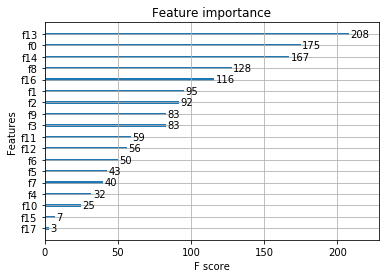

In [707]:
from xgboost import plot_importance
plot_importance(model,max_num_features=20)
plt.show()

In [708]:
model.score(X_test,Y_test)
Y_pred = model.predict(X_test)
r2_score(Y_test,Y_pred)

0.78049366228273531

## XGBoost R Sqaure寫法

In [69]:
from sklearn.metrics import r2_score
import xgboost as xgb
x_train, x_valid, y_train, y_valid = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 50

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:4.16416	valid-rmse:4.16061	train-r2:-436.332	valid-r2:-411.43
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:3.40474	valid-rmse:3.40125	train-r2:-291.364	valid-r2:-274.621
[20]	train-rmse:2.78457	valid-rmse:2.78096	train-r2:-194.556	valid-r2:-183.257
[30]	train-rmse:2.27811	valid-rmse:2.27414	train-r2:-129.889	valid-r2:-122.217
[40]	train-rmse:1.86458	valid-rmse:1.86066	train-r2:-86.6833	valid-r2:-81.4843
[50]	train-rmse:1.52702	valid-rmse:1.52353	train-r2:-57.8089	valid-r2:-54.302
[60]	train-rmse:1.25157	valid-rmse:1.24885	train-r2:-38.5064	valid-r2:-36.1582
[70]	train-rmse:1.02692	valid-rmse:1.02496	train-r2:-25.5969	valid-r2:-24.0292
[80]	train-rmse:0.843808	valid-rmse:0.842708	train-r2:-16.9574	valid-r2:-15.9196
[90]	train-rmse:0.694724	valid-rmse:0.694539	train-r2:-11.1725	valid-r2:-10.4929
[100]	train-rmse:0.573559	valid-rmse:0.574464	train-r2:-7.29683	vali

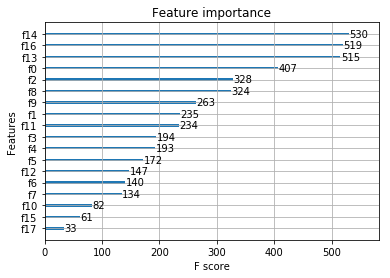

In [70]:
from xgboost import plot_importance
plot_importance(clf,max_num_features=20)
plt.show()

In [352]:
total_features.columns

Index(['Convi_Dis', 'Trans_Dis', 'Resta_Dis', 'Trans_P', 'Dali_AllRe',
       'Dali_Convi', 'Dali_Convi', 'Dali_Hotel', 'Dali_Indus', 'Dali_Major',
       'Dali_MixRe', 'Dali_Pure', 'Daili_Resta', '建物移轉總面積平方公尺', 'Dali_age',
       'Dali_Materials', 'Dali_layers'],
      dtype='object')

## 跑Rita & Yoga 整的大表

In [709]:
rita_feature = pd.read_csv('varlist0.csv',index_col=0)

In [24]:
label = real_data.單價每平方公尺
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median
label.to_csv('label.csv',index=False)

In [25]:
label=np.log10(label)
#np.any(np.isneginf(label))

In [17]:
rita_feature.columns

Index(['POI_art_musm_cnt_100', 'POI_art_musm_cnt_200', 'POI_art_musm_cnt_500',
       'POI_art_musm_cnt_1000', 'POI_art_musm_cnt_1500',
       'POI_art_musm_cnt_2000', 'POI_conv_cnt_100', 'POI_conv_cnt_200',
       'POI_conv_cnt_500', 'POI_conv_cnt_1000',
       ...
       '勤美草悟道', '美術園道', '第五市場', '中興商圈', '大慶商圈', '一中街商圈', '中國醫藥商圈', '科博館商圈',
       '中區', 'admin_area'],
      dtype='object', length=128)

In [26]:
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(rita_feature.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 50

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:4.16227	valid-rmse:4.16073	train-r2:-423.477	valid-r2:-447.908
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:3.40324	valid-rmse:3.40164	train-r2:-282.778	valid-r2:-299.051
[20]	train-rmse:2.78344	valid-rmse:2.78177	train-r2:-188.826	valid-r2:-199.659
[30]	train-rmse:2.2775	valid-rmse:2.27574	train-r2:-126.089	valid-r2:-133.295
[40]	train-rmse:1.86472	valid-rmse:1.86286	train-r2:-84.1959	valid-r2:-88.9866
[50]	train-rmse:1.52815	valid-rmse:1.52628	train-r2:-56.2167	valid-r2:-59.4069
[60]	train-rmse:1.25398	valid-rmse:1.25208	train-r2:-37.528	valid-r2:-39.6522
[70]	train-rmse:1.031	valid-rmse:1.02918	train-r2:-25.044	valid-r2:-26.466
[80]	train-rmse:0.850006	valid-rmse:0.848357	train-r2:-16.7026	valid-r2:-17.6627
[90]	train-rmse:0.703476	valid-rmse:0.702293	train-r2:-11.1253	valid-r2:-11.7895
[100]	train-rmse:0.585293	valid-rmse:0.584765	train-r2:-7.39342	valid-r2

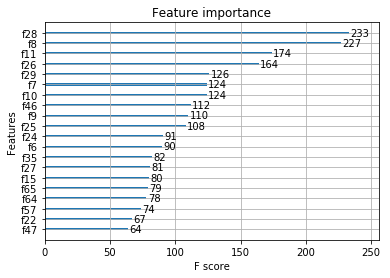

In [27]:
from xgboost import plot_importance
plot_importance(clf,max_num_features=20)
plt.show()

## 跑Alvin建議

In [57]:
rita_feature = pd.read_csv('varlist0.csv', index_col=0)

In [58]:
Convi_Dis = pd.read_csv('Convi_Dis.csv')

In [59]:
Trans_Dis = pd.read_csv('Trans_Dis.csv')

In [60]:
Resta_Dis = pd.read_csv('Resta_Dis.csv')

In [61]:
Dali_Major = pd.read_csv('Dali_Major.csv')

In [62]:
Dali_MixRe = pd.read_csv('Dali_MixRe.csv')

In [63]:
Dali_Pure = pd.read_csv('Dali_Pure.csv')

In [64]:
Dali_AllRe = pd.read_csv('Dali_AllRe.csv')

In [65]:
TC_Area_feature = pd.read_csv('TC_area_feature.csv')
TC_Area_feature = TC_Area_feature.drop(['admin_area'],axis=1)

In [66]:
Dali_age = pd.DataFrame((real_data.交易年月日-real_data.建築完成年月)/10000)
Dali_age.columns = ['Dali_age']
Dali_age=Dali_age.fillna('0')
Dali_age.shape

(2682, 1)

In [67]:
Dali_area=real_data.建物移轉總面積平方公尺

In [68]:
yoga_feature = pd.read_csv('feature_by_yoga.csv')
yoga_feature.shape
#yoga_feature = yoga_feature.drop(['中區', '北區', '北屯區', '南區', '南屯區',
#       '后里區', '外埔區', '大安區', '大甲區', '大肚區', '大里區', '大雅區', '太平區', '新社區', '東勢區',
#       '東區', '梧棲區', '沙鹿區', '清水區', '潭子區', '烏日區', '石岡區', '神岡區', '西區', '西屯區',
#       '豐原區', '霧峰區', '龍井區'],axis=1)

(2682, 42)

In [69]:
Dali_btype = real_data.建物型態

In [70]:
h_admin = pd.read_csv('h_admin.csv')

In [71]:
label = real_data.總價元

In [72]:
total_features = pd.concat([label,h_admin,Convi_Dis,Trans_Dis,Resta_Dis,Dali_Major,Dali_age,Dali_area,Dali_Pure,Dali_AllRe,yoga_feature,rita_feature,TC_Area_feature],axis=1)

In [ ]:
total_features = total_features[total_features['建物型態'] != '辦公商業大樓']
total_features = total_features[total_features['建物型態'] !=  '農舍']
total_features = total_features[total_features['建物型態'] !=  '工廠']
total_features = total_features[total_features['建物型態'] !=  '倉庫']

In [73]:
total_features=total_features[total_features['may_be_zero']!=1]
total_features.shape

(2633, 197)

In [74]:
total_features = total_features[total_features['建物移轉總面積平方公尺']<=2000]
total_features.shape

(2629, 197)

In [75]:
label.shape

(2682,)

In [76]:
total_features['Dali_age']=total_features['Dali_age'].astype(np.float32)
total_features = total_features[total_features['Dali_age']<=60]
total_features.shape

(2625, 197)

In [77]:
label = total_features['總價元']
total_features = total_features.drop(['總價元','may_be_zero'],axis=1)

In [581]:
total_features = total_features.drop(['單元十三', '單元十二', '單元八', '單元十四', '單元五', '單元四', '單元三', '單元二',
       'POI_library_cnt_200', '十四期(含單元九、十、十一)', '十三期(含單元六、七)', '十二期',
       '廍子區段徵收', '十期', '九期', '八期', '七期', '六期', '五期', '四期', '十一期', '水湳經貿園區',
       '中科園區', '旱溪的西側', '科博館商圈', '中國醫藥商圈', '一中街商圈', '大慶商圈', '中興商圈', '第五市場',
       '美術園道', '勤美草悟道', 'Rezone_5', '旱溪的東側', '東山市場之東側', '台中世貿商圈', '東山市場',
       '松竹商圈', '后庄商圈', '四張犁商圈', '楓樹商圈', '黎明商圈', '嶺東商圈', '櫻花商圈', '逢甲商圈',
       '二期', '三期', 'POI_transport_cnt_200', '一期', 'POI_museum_cnt_200',
       '豐原區', '霧峰區', '住宅大樓', 'POI_park_cnt_200', 'POI_park_cnt_100',
       'POI_museum_cnt_2000', 'POI_museum_cnt_1500', 'POI_museum_cnt_1000',
       'POI_museum_cnt_500', 'POI_museum_cnt_100', '西區', '套房',
       'POI_market_cnt_200', 'POI_market_cnt_100', 'POI_art_musm_cnt_100',
       'POI_art_musm_cnt_200', 'POI_art_musm_cnt_500',
       'POI_art_musm_cnt_1000', 'POI_art_musm_cnt_1500',
       'POI_art_musm_cnt_2000', 'POI_parkinglot_cnt_100', '神岡區', '中區',
       '外埔區', '北區', '南區', 'POI_library_cnt_100', 'POI_transport_cnt_100',
       '南屯區', 'POI_square_cnt_1000', 'POI_square_cnt_500',
       'POI_square_cnt_200', 'POI_square_cnt_100', '大安區', '石岡區', '大甲區',
       '大肚區', '大里區', '大雅區', '新社區', '東勢區', '東區', '梧棲區', '潭子區', '中區'],axis=1)

In [727]:
total_features.shape

(2633, 195)

In [25]:
## 若不考慮建築型態 就跑這行
label = real_data.單價每平方公尺
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median

In [78]:
label=np.log10(label)
label.shape

(2625,)

In [246]:
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 1000
params['nthread']=4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:6.26057	valid-rmse:6.25698	train-r2:-264.975	valid-r2:-267.584
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:5.11694	valid-rmse:5.11432	train-r2:-176.678	valid-r2:-178.443
[20]	train-rmse:4.18266	valid-rmse:4.18086	train-r2:-117.718	valid-r2:-118.917
[30]	train-rmse:3.41951	valid-rmse:3.4184	train-r2:-78.3487	valid-r2:-79.1672
[40]	train-rmse:2.79621	valid-rmse:2.79565	train-r2:-52.0581	valid-r2:-52.6186
[50]	train-rmse:2.28724	valid-rmse:2.28719	train-r2:-34.5007	valid-r2:-34.8885
[60]	train-rmse:1.87177	valid-rmse:1.8722	train-r2:-22.7748	valid-r2:-23.0467
[70]	train-rmse:1.53277	valid-rmse:1.53356	train-r2:-14.9429	valid-r2:-15.1343
[80]	train-rmse:1.25638	valid-rmse:1.25753	train-r2:-9.71162	valid-r2:-9.84898
[90]	train-rmse:1.03125	valid-rmse:1.03258	train-r2:-6.21675	valid-r2:-6.31475
[100]	train-rmse:0.848165	valid-rmse:0.849735	train-r2:-3.88172	valid-r2

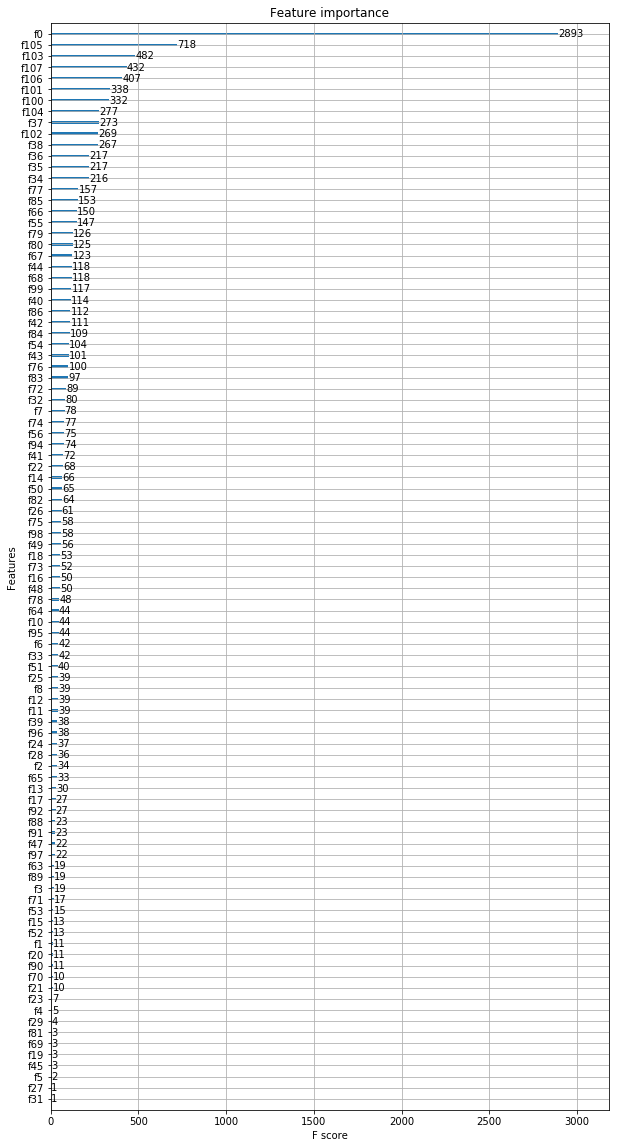

In [247]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 20))
plot_importance(clf,ax=ax)
plt.show()

In [494]:
total_features.columns

Index(['h_admin', 'Convi_Dis', 'Trans_Dis', 'Resta_Dis', 'Dali_Major',
       'Dali_age', '建物移轉總面積平方公尺', 'Dali_Pure', 'Dali_AllRe', 'total_layers',
       ...
       '精明一街', '勤美草悟道', '美術園道', '第五市場', '中興商圈', '大慶商圈', '一中街商圈', '中國醫藥商圈',
       '科博館商圈', '中區'],
      dtype='object', length=195)

In [340]:
yoga_feature.columns

Index(['total_layers', 'Rezone_5', 'Rezone_7', '中區', '北區', '北屯區', '南區', '南屯區',
       '后里區', '外埔區', '大安區', '大甲區', '大肚區', '大里區', '大雅區', '太平區', '新社區', '東勢區',
       '東區', '梧棲區', '沙鹿區', '清水區', '潭子區', '烏日區', '石岡區', '神岡區', '西區', '西屯區',
       '豐原區', '霧峰區', '龍井區', 'admin_area', '住宅大樓', '公寓', '套房', '華廈', '透天厝',
       'others', '商用', 'may_be_zero', 'BM_B', 'BM_R'],
      dtype='object')

In [64]:
rita_feature.columns

Index(['Commercial_Res_100', 'Commercial_Res_200', 'Commercial_Res_500',
       'Commercial_Res_1000', 'Commercial_Res_1500', 'Commercial_Res_2000',
       'Indus_Res_100', 'Indus_Res_200', 'Indus_Res_500', 'Indus_Res_1000',
       'Indus_Res_1500', 'Indus_Res_2000', 'Mix_Res_100', 'Mix_Res_200',
       'Mix_Res_500', 'Mix_Res_1000', 'Mix_Res_1500', 'Mix_Res_2000',
       'POI_art_musm_cnt_100', 'POI_art_musm_cnt_200', 'POI_art_musm_cnt_500',
       'POI_art_musm_cnt_1000', 'POI_art_musm_cnt_1500',
       'POI_art_musm_cnt_2000', 'POI_conv_cnt_100', 'POI_conv_cnt_200',
       'POI_conv_cnt_500', 'POI_conv_cnt_1000', 'POI_conv_cnt_1500',
       'POI_conv_cnt_2000', 'POI_hotel_cnt_100', 'POI_hotel_cnt_200',
       'POI_hotel_cnt_500', 'POI_hotel_cnt_1000', 'POI_hotel_cnt_1500',
       'POI_hotel_cnt_2000', 'POI_library_cnt_100', 'POI_library_cnt_200',
       'POI_library_cnt_500', 'POI_library_cnt_1000', 'POI_library_cnt_1500',
       'POI_library_cnt_2000', 'POI_mark_cnt_100', 'POI_mark

In [83]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline
X_train, X_test, Y_train, Y_test = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3)
eval_set =  [(X_test, Y_test)]

print('start modelling!')
model = XGBRegressor(n_estimators=100,max_depth=4)
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set,
         verbose=True)

Populating the interactive namespace from numpy and matplotlib
start modelling!
[0]	validation_0-rmse:5.74679
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5.17391
[2]	validation_0-rmse:4.65899
[3]	validation_0-rmse:4.19558
[4]	validation_0-rmse:3.77874
[5]	validation_0-rmse:3.40325
[6]	validation_0-rmse:3.06578
[7]	validation_0-rmse:2.76132
[8]	validation_0-rmse:2.48789
[9]	validation_0-rmse:2.24216
[10]	validation_0-rmse:2.02106
[11]	validation_0-rmse:1.82226
[12]	validation_0-rmse:1.64399
[13]	validation_0-rmse:1.48316
[14]	validation_0-rmse:1.33845
[15]	validation_0-rmse:1.20828
[16]	validation_0-rmse:1.09099
[17]	validation_0-rmse:0.986158
[18]	validation_0-rmse:0.892124
[19]	validation_0-rmse:0.807356
[20]	validation_0-rmse:0.730995
[21]	validation_0-rmse:0.663397
[22]	validation_0-rmse:0.602206
[23]	validation_0-rmse:0.547629
[24]	validation_0-rmse:0.498535
[25]	validation_0-rmse:0.455537
[26]	validation_0-rmse:0.416887
[27]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [84]:
model.score(X_test,Y_test)
Y_pred = model.predict(X_test)
r2_score(Y_test,Y_pred)

0.82082060296978665

## 跑RandomForest

In [85]:
from sklearn.datasets import load_iris, load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(total_features.as_matrix(), label.as_matrix(),
                                                    random_state=random_seed
                                                   )

In [87]:
reg = RandomForestRegressor(n_estimators=100)

In [88]:
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred = reg.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
#reg.score(x_test,y_test)
r2_score(y_test,y_pred)

0.83001006582528425

                        importance
feature                           
建物移轉總面積平方公尺                  0.663
total_layers                 0.042
Dali_age                     0.032
透天厝                          0.029
POI_conv_cnt_2000            0.010
POI_mark_cnt_1000            0.010
Trans_Dis                    0.009
POI_park_cnt_2000            0.008
POI_conv_cnt_1000            0.008
POI_mark_cnt_2000            0.006
POI_rest_cnt_1500            0.006
POI_mark_cnt_500             0.005
POI_rest_cnt_1000            0.005
POI_park_cnt_1000            0.005
POI_rest_cnt_2000            0.005
POI_mark_cnt_200             0.005
POI_conv_cnt_1500            0.005
Convi_Dis                    0.005
Dali_Major                   0.005
Resta_Dis                    0.005
Indus_Res_500                0.004
Indus_Res_1000               0.004
Indus_Res_1500               0.004
POI_mark_cnt_1500            0.004
Indus_Res_2000               0.004
Mix_Res_1000                 0.004
Mix_Res_100         

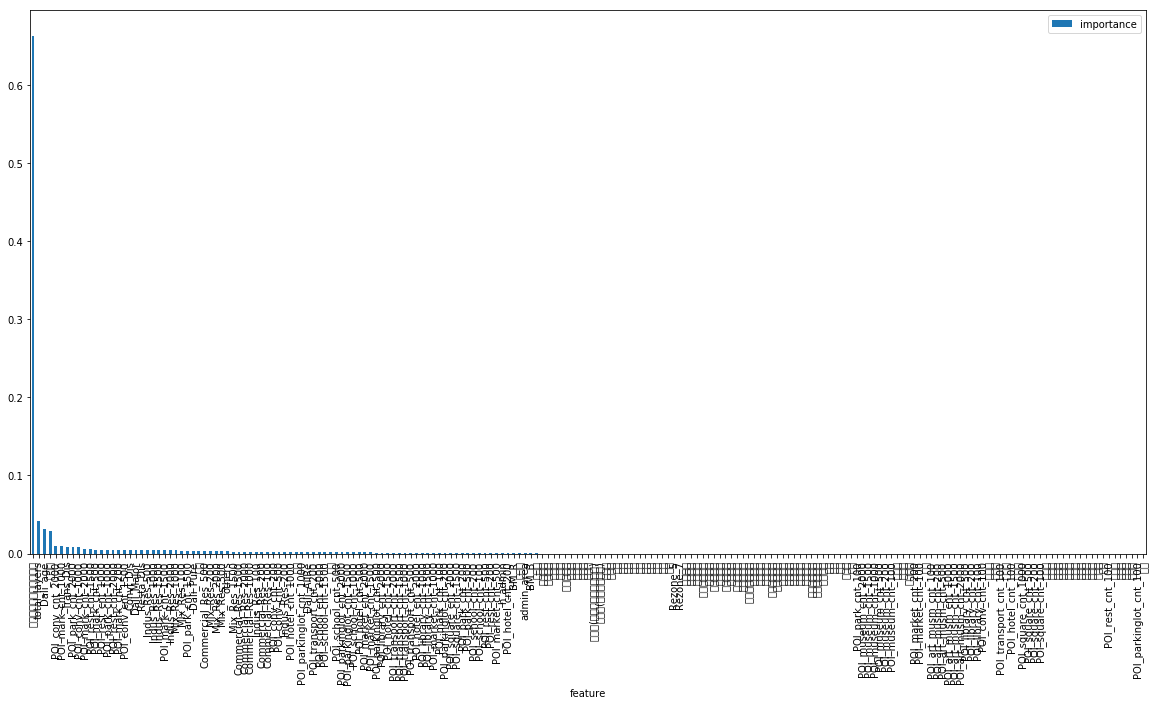

In [91]:
importances = pd.DataFrame({'feature':total_features.columns,'importance':np.round(reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances)
importances.to_csv('RF2_imporance.csv')

fig, ax = plt.subplots(figsize = (20, 10))
importances.plot.bar(ax=ax)

In [540]:
importances.index.values

array(['total_layers', 'Dali_age', '建物移轉總面積平方公尺', 'POI_rest_cnt_1500',
       '透天厝', 'POI_rest_cnt_2000', 'POI_mark_cnt_1500', '商用',
       'POI_mark_cnt_1000', 'POI_conv_cnt_2000', 'POI_mark_cnt_2000',
       'POI_park_cnt_2000', 'Mix_Res_1000', 'POI_conv_cnt_1000',
       'Resta_Dis', 'Trans_Dis', 'Indus_Res_2000', 'Dali_Major',
       'Convi_Dis', 'POI_rest_cnt_1000', 'admin_area',
       'Commercial_Res_2000', 'Mix_Res_500', 'Mix_Res_1500',
       'Commercial_Res_1000', 'Indus_Res_1000', 'Indus_Res_1500',
       'Commercial_Res_1500', 'Commercial_Res_500', 'Mix_Res_100',
       'POI_mark_cnt_500', 'Indus_Res_500', 'Mix_Res_2000',
       'POI_parkinglot_cnt_2000', 'POI_conv_cnt_1500', 'Dali_Pure',
       'others', 'POI_hotel_cnt_1000', 'POI_park_cnt_1000',
       'Commercial_Res_200', 'POI_hotel_cnt_1500', 'Commercial_Res_100',
       'POI_park_cnt_1500', 'Indus_Res_200', 'Indus_Res_100',
       'Mix_Res_200', 'Dali_AllRe', 'POI_school_cnt_1500',
       'POI_mark_cnt_200', 'POI_libr

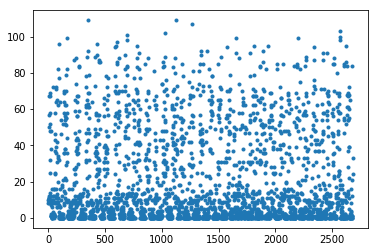

In [593]:
plt.plot(total_features.index,total_features['POI_rest_cnt_1500'],'.')

## 跑SVM

In [ ]:
random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(total_features.as_matrix(), label.as_matrix(),
                                                    random_state=random_seed
                                                   )

In [234]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [235]:
from sklearn.metrics import r2_score
clf.score(x_test,y_test)

0.0028678189518084318

In [238]:
y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)

0.0028678189518084318

## 跑80K

In [6]:
_80k_real_data = pd.read_csv('tgos_80k.csv',index_col=0)
_80k_real_data.columns

Index(['index', '鄉鎮市區', '交易標的', '土地區段位置/建物區段門牌', '土地移轉總面積(平方公尺)', '都市土地使用分區',
       '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態',
       '主要用途', '主要建材', '建築完成年月', '建物移轉總面積(平方公尺)', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價(元)', '單價(元/平方公尺)', '車位類別',
       '車位移轉總面積(平方公尺)', '車位總價(元)', '備註', '編號', '登記日期', 'Address_x', 'id',
       'Address_y', 'Response_Address', 'Response_X', 'Response_Y',
       'csv_file_name'],
      dtype='object')

In [398]:
Dali_btype = _80k_real_data.建物型態
Dali_btype = Dali_btype.reset_index(drop=True)
Dali_btype = pd.get_dummies(Dali_btype)
Dali_btype.columns

Index(['住宅大樓(11層含以上有電梯)', '倉庫', '公寓(5樓含以下無電梯)', '其他', '套房(1房1廳1衛)', '工廠',
       '店面(店鋪)', '廠辦', '華廈(10層含以下有電梯)', '辦公商業大樓', '農舍', '透天厝'],
      dtype='object')

In [399]:
def convertChineseDigitsToArabic (chinese_digits, encoding="utf-8"):
    chs_arabic_map = {u'零':0, u'一':1, u'二':2, u'三':3, u'四':4,u'五':5, u'六':6, u'七':7, u'八':8, u'九':9,u'十':10}
    result  = 0
    tmp     = 0
    hnd_mln = 0
    for count in range(len(chinese_digits)):
        curr_char  = chinese_digits[count]
        curr_digit = chs_arabic_map.get(curr_char, None)
        #print(count)
        if curr_digit >= 10:
            tmp    = 1 if tmp == 0 else tmp
            result = result + curr_digit * tmp
            tmp    = 0
        # meet single digit
        elif curr_digit is not None:
            tmp = tmp * 10 + curr_digit
        else:
            return result
    result = result + tmp
    result = result + hnd_mln
    return result

In [400]:
layer = _80k_real_data.總樓層數.str[:-1]

layer = layer.fillna('零')

layer = layer.replace('地下','五十')

layer = layer.replace('見其他登記事','六十')
layer = layer.replace('(空白','六十')

layer_num = [convertChineseDigitsToArabic(i) for i in layer]

layer_num = [-1 if i == 50 else i for i in layer_num ]

layer_num = [5 if i == 60 else i for i in layer_num ]

ladf = pd.DataFrame(layer_num,columns=['total_layers'])

In [401]:
ladf.shape

(78685, 1)

In [402]:
Dali_age = pd.DataFrame((_80k_real_data.交易年月日-_80k_real_data.建築完成年月)/10000)
Dali_age.columns = ['Dali_age']
Dali_age=Dali_age.fillna('0')
Dali_age.shape
Dali_age=Dali_age.reset_index(drop=True)

In [403]:
Dali_area=pd.DataFrame(_80k_real_data['建物移轉總面積(平方公尺)'])
Dali_area=Dali_area.reset_index(drop=True)

In [404]:
label = pd.DataFrame(_80k_real_data['總價(元)'])
label = label.reset_index(drop=True)

In [405]:
POI_feature = pd.read_csv('POI_11_all.csv',index_col=0)
POI_feature.shape

(78685, 66)

In [406]:
yoga_30000_feature = pd.read_csv('30000_feature.csv')
yoga_30000_feature = yoga_30000_feature.drop(['住宅大樓', '公寓', '套房', '華廈',
       '透天厝', 'others', '商用', 'may_be_zero'],axis=1)
#yoga_30000_feature = yoga_30000_feature.drop(['total_layers','BM_B','BM_R'],axis=1)

In [411]:
area_30000_feature = pd.read_csv('area.csv',index_col=0)
area_30000_feature.shape

(30000, 9)

In [417]:
_80k_real_data = _80k_real_data.reset_index(drop=True)

In [418]:
total_features = pd.concat([Dali_area.iloc[0:30000,:],Dali_btype.iloc[0:30000,:],yoga_30000_feature,Dali_age.iloc[0:30000,:],POI_feature.iloc[0:30000,:],area_30000_feature,_80k_real_data.iloc[0:30000,:]],axis=1)
#total_features = pd.concat([Dali_area.iloc[0:30000,:],yoga_30000_feature,POI_feature.iloc[0:30000,:],area_30000_feature],axis=1)
#total_features.to_csv('allen_concat_data.csv')
total_features.shape

(30000, 161)

In [409]:
total_features= total_features.drop(['建物移轉總面積(平方公尺)'],axis=1)

In [410]:
total_features.shape

(30000, 123)

## 去掉前後100筆 or 5%資料

In [245]:
index=list(label.sort_values(by=['單價(元/平方公尺)']).index)
total_features=total_features.loc[index].iloc[1500:30000,:]
total_features=total_features.iloc[0:27000,:]
label=label.loc[index].iloc[1500:30000,:]
label=label.iloc[0:27000,:]
label.shape

KeyError: '單價(元/平方公尺)'

In [153]:
total_features.shape

(29800, 124)

In [25]:
total_features=total_features[total_features['may_be_zero']!=1]
total_features.shape

(29546, 132)

In [278]:
label = total_features['總價(元)']
total_features = total_features.drop(['總價(元)','may_be_zero'],axis=1)

In [279]:
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median
label=np.log10(label)
label.shape

(29546,)

In [226]:
total_features.shape

(29546, 123)

In [365]:
label = _80k_real_data['總價(元)']
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median
label=np.log10(label)
label = pd.DataFrame(label)
label = label.iloc[0:30000,:]
label=label.reset_index(drop=True)
label.shape

(30000, 1)

In [266]:
label = _80k_real_data['總價(元)']
label=label.fillna(0)
label[label <= 0]

level_0
8638     0
16240    0
17438    0
17490    0
17766    0
43603    0
Name: 總價(元), dtype: int64

In [261]:
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train,feature_names=total_features.columns.values)
d_valid = xgb.DMatrix(x_valid, label=y_valid,feature_names=total_features.columns.values)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 100
params['nthread'] = 4
#params['learning_rate']=0.01

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 5000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:6.26057	valid-rmse:6.25698	train-r2:-264.975	valid-r2:-267.584
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:5.11693	valid-rmse:5.11432	train-r2:-176.678	valid-r2:-178.443
[20]	train-rmse:4.18265	valid-rmse:4.18085	train-r2:-117.718	valid-r2:-118.917
[30]	train-rmse:3.41944	valid-rmse:3.4183	train-r2:-78.3455	valid-r2:-79.1623
[40]	train-rmse:2.79604	valid-rmse:2.79546	train-r2:-52.0517	valid-r2:-52.6116
[50]	train-rmse:2.28691	valid-rmse:2.28692	train-r2:-34.4904	valid-r2:-34.88
[60]	train-rmse:1.8712	valid-rmse:1.87166	train-r2:-22.7603	valid-r2:-23.0327
[70]	train-rmse:1.53188	valid-rmse:1.53264	train-r2:-14.9245	valid-r2:-15.1149
[80]	train-rmse:1.25509	valid-rmse:1.25616	train-r2:-9.68961	valid-r2:-9.82536
[90]	train-rmse:1.02947	valid-rmse:1.03074	train-r2:-6.19182	valid-r2:-6.28865
[100]	train-rmse:0.845608	valid-rmse:0.847091	train-r2:-3.85233	valid-r2:-

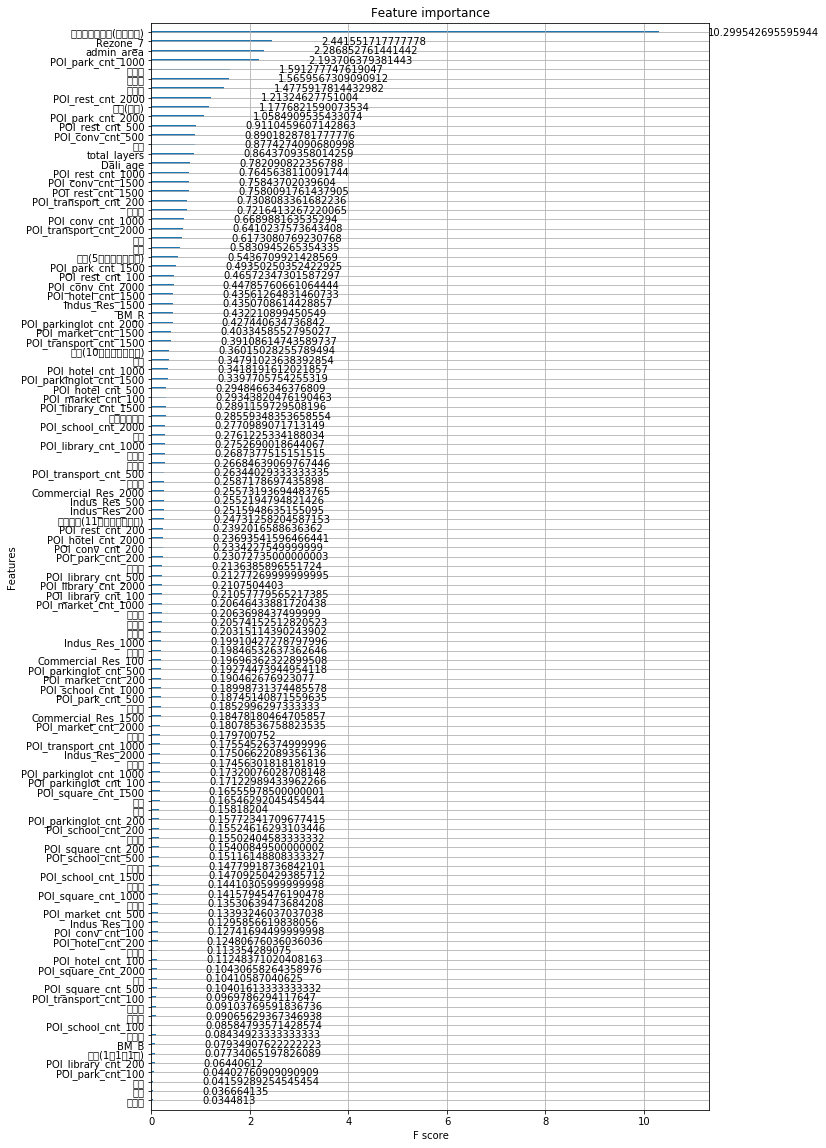

In [262]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 20))
plot_importance(clf,ax=ax,importance_type='gain')
plt.show()

In [38]:
clf.save_model('NCKU_house_predict_xgb.model')

In [29]:
from sklearn.datasets import load_iris, load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [431]:
random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(total_features.as_matrix(), label.as_matrix(),
                                                    random_state=random_seed
                                                   )
reg = RandomForestRegressor(n_estimators=100,n_jobs=50)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
#reg.score(x_test,y_test)
r2_score(y_test,y_pred)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.43401506815129165

                         importance
feature                            
建物移轉總面積(平方公尺)                 0.797
POI_rest_cnt_2000             0.010
POI_conv_cnt_1500             0.010
POI_conv_cnt_2000             0.009
POI_park_cnt_2000             0.008
POI_school_cnt_2000           0.008
POI_conv_cnt_500              0.007
POI_conv_cnt_1000             0.007
POI_park_cnt_1500             0.007
POI_school_cnt_1500           0.006
POI_school_cnt_1000           0.006
POI_market_cnt_2000           0.005
POI_park_cnt_1000             0.005
POI_parkinglot_cnt_2000       0.005
POI_rest_cnt_500              0.005
POI_rest_cnt_1500             0.005
POI_rest_cnt_1000             0.005
POI_hotel_cnt_2000            0.004
Rezone_7                      0.004
POI_school_cnt_500            0.004
POI_hotel_cnt_500             0.004
POI_conv_cnt_200              0.004
POI_market_cnt_1500           0.004
POI_hotel_cnt_1500            0.003
POI_hotel_cnt_1000            0.003
POI_library_cnt_2000        

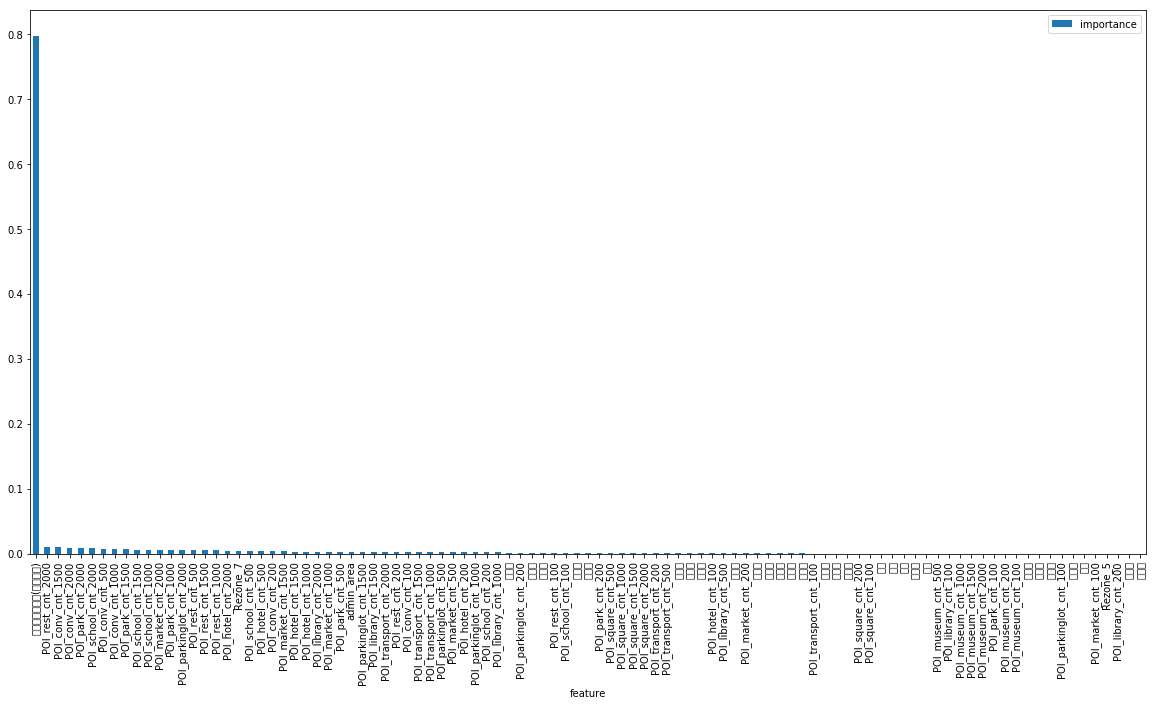

In [210]:
importances = pd.DataFrame({'feature':total_features.columns,'importance':np.round(reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances)
importances.to_csv('RF_imporance_總價.csv')

fig, ax = plt.subplots(figsize = (20, 10))
importances.plot.bar(ax=ax)

In [429]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline
X_train, X_test, Y_train, Y_test = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3)
eval_set =  [(X_test, Y_test)]

print('start modelling!')
model = XGBRegressor(n_estimators=1000,max_depth=4)
model.fit(X_train, Y_train, early_stopping_rounds=50, eval_metric="rmse", eval_set=eval_set,
         verbose=True)

Populating the interactive namespace from numpy and matplotlib
start modelling!


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['median']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[0]	validation_0-rmse:3.79485
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.41656
[2]	validation_0-rmse:3.07612
[3]	validation_0-rmse:2.76981
[4]	validation_0-rmse:2.49425
[5]	validation_0-rmse:2.24642
[6]	validation_0-rmse:2.02347
[7]	validation_0-rmse:1.82288
[8]	validation_0-rmse:1.64247
[9]	validation_0-rmse:1.48023
[10]	validation_0-rmse:1.33443
[11]	validation_0-rmse:1.20347
[12]	validation_0-rmse:1.08583
[13]	validation_0-rmse:0.980131
[14]	validation_0-rmse:0.885303
[15]	validation_0-rmse:0.800287
[16]	validation_0-rmse:0.723999
[17]	validation_0-rmse:0.655945
[18]	validation_0-rmse:0.59499
[19]	validation_0-rmse:0.540509
[20]	validation_0-rmse:0.492022
[21]	validation_0-rmse:0.448828
[22]	validation_0-rmse:0.410524
[23]	validation_0-rmse:0.376778
[24]	validation_0-rmse:0.34677
[25]	validation_0-rmse:0.320402
[26]	validation_0-rmse:0.297431
[27]	validation_0-rmse:0.277249
[28]	validation_0-rmse:0.259912
[29]	validation_0-rmse:0.244983


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [430]:
from sklearn.metrics import r2_score
model.score(X_test,Y_test)
Y_pred = model.predict(X_test)
r2_score(Y_test,Y_pred)

0.44579648685502793

In [90]:
import pickle
pickle.dump(model, open("NCKU_House_Predict_xgbR.model", "wb"))

                        importance
feature                           
Dali_age                     0.146
total_layers                 0.076
Commercial_Res_2000          0.038
Indus_Res_2000               0.032
Indus_Res_1500               0.029
Indus_Res_500                0.028
Indus_Res_1000               0.026
Commercial_Res_1500          0.026
Commercial_Res_100           0.024
csv_file_name                0.020
POI_conv_cnt_1500            0.019
POI_conv_cnt_2000            0.019
Indus_Res_200                0.018
Indus_Res_100                0.018
POI_conv_cnt_500             0.017
POI_conv_cnt_200             0.016
POI_conv_cnt_1000            0.015
POI_rest_cnt_2000            0.013
其他                           0.013
POI_rest_cnt_500             0.013
POI_hotel_cnt_500            0.012
POI_school_cnt_2000          0.012
套房(1房1廳1衛)                   0.011
POI_rest_cnt_1500            0.011
POI_hotel_cnt_1500           0.011
公寓(5樓含以下無電梯)                 0.011
POI_school_cnt_1500 

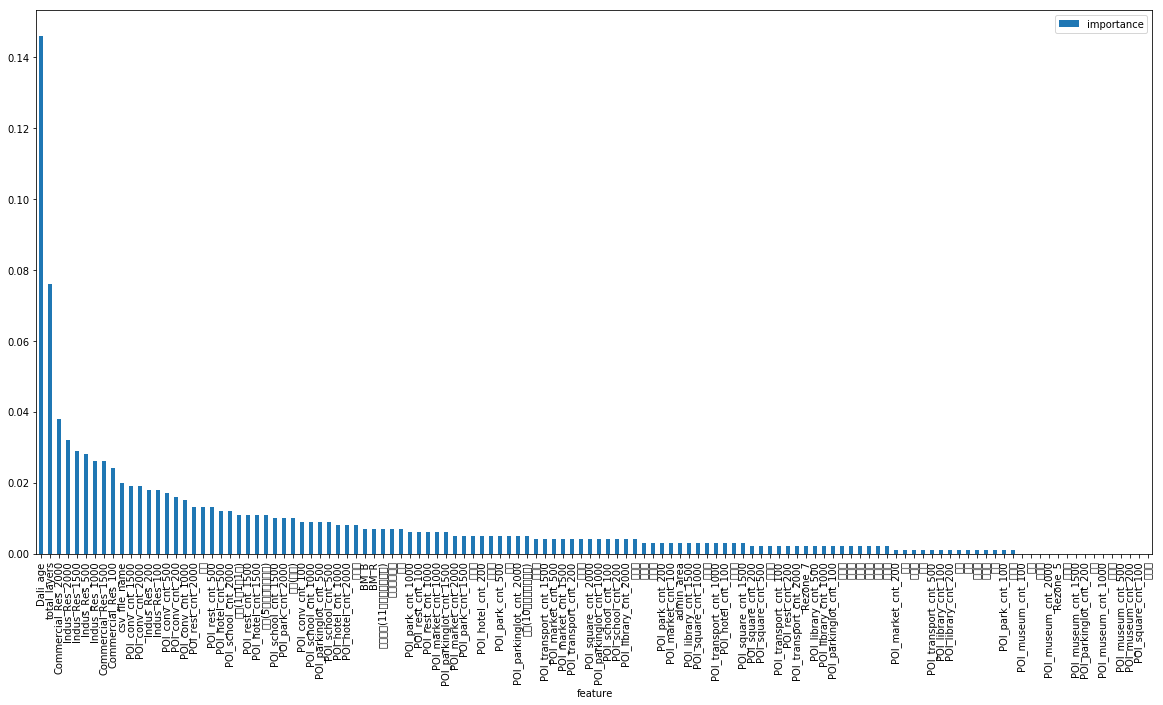

In [432]:
importances = pd.DataFrame({'feature':total_features.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances)
importances.to_csv('XGB_imporance-POI-area_總價.csv')

fig, ax = plt.subplots(figsize = (20, 10))
importances.plot.bar(ax=ax)

In [211]:
s_Y_test=np.sort(Y_test, axis=0)
s_Y_pred=np.sort(Y_pred, axis=0)

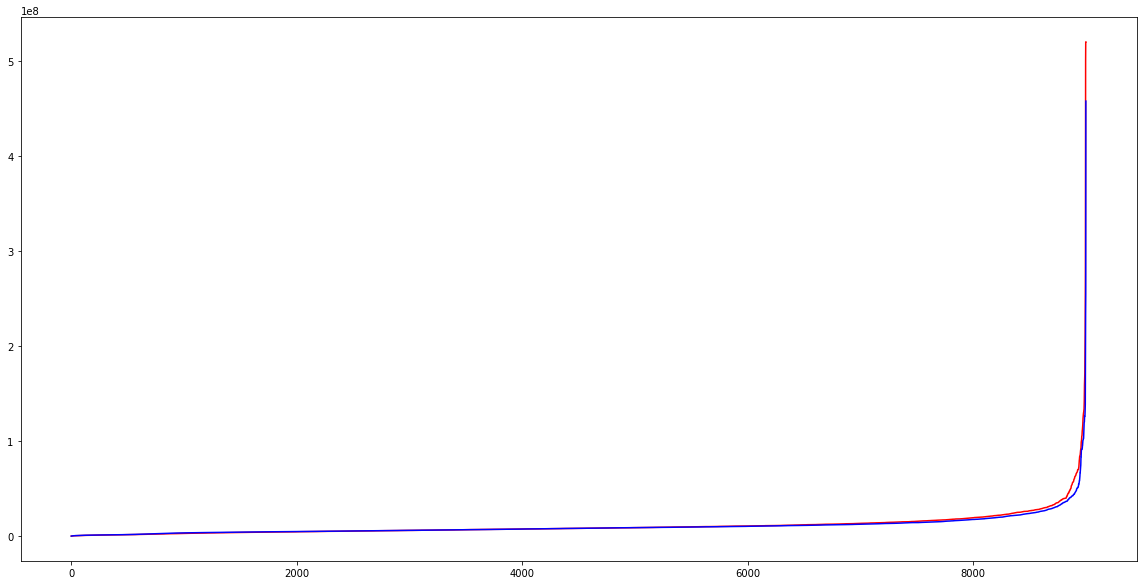

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(10**s_Y_test,color='red')
plt.plot(10**s_Y_pred,color='blue')
#plt.scatter(Y_pred.x,color='blue')
plt.show()

array([[ 4.67755221],
       [ 4.79734373],
       [ 4.71474876],
       ..., 
       [ 4.66242726],
       [ 4.01915785],
       [ 4.9495754 ]])

## 跑30K Data

In [ ]:
_30k_real_data = _80

In [420]:
non_car_list=pd.DataFrame(_30k_real_data['交易筆棟數'].str.split('車位').str.get(1))
#non_car = _80k_real_data.loc[non_car_list]
non_car_list=non_car_list[non_car_list.交易筆棟數.astype(int)==0]
_30k_real_data=_30k_real_data.loc[non_car_list.index]
_30k_real_data.shape

(14323, 161)